# **Painting Dataset**

### **Data Description:**
In my project I will perform image processing to analyzing paintings images and perform NLP on the title and description of the image to see the emotions evoked from the paintings. I will compare the emotion results I get from the image of the painting and the title and description of the painting


### **Data Content:**
Here's a list of colours commonly used to identify several emotions:

Red: Anger, embarrassment, passion, or love.

Blue: Shyness, sadness, or calmness.

Yellow: Cowardice, happiness, cheerful, or caution.

Green: Disgust, envy, ,greed,friendliness, soothing, calm, or safety

Purple: Pride, fear, or courage.

Grey: Depression, regular sadness, or stoicism.

Black: Coldness or mournfulness.

Pink: Cheeriness, embarrassment, or love.

White: Shock, fear, coldness, or mournfulness.

Orange: happiness and healthy

Purple: sadness, disgust, or mystery

-------------------------------------------------------------------------------------------------------------------------


Lines

A dark, thick, angled line can show anger or being mad
A thin, flowing, rounded line can show happiness


Shapes

Squares, triangles and rectangles can show anger, fear, confusion
Ovals can show sadness
Circles can show happiness and joy


### **Data Dictionary:**

- ID = Painting ID
- Category = Painting style (mpressionism, realism, .. etc)
- Artist = The artist's name
- Title = The title of the Painting 
- Year = The year of the painting
- Image URL = URL of the website that contains the image
- Painting Info URLe = Info of the painting link
- Artist Info URL = Info on the artist link




#### Import libraries and read files

In [40]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_density, geom_line, geom_point, ggtitle
from sklearn.neighbors import LocalOutlierFactor #Outliar handling

# Modeling process
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from colorthief import ColorThief
import webcolors

In [4]:
df = pd.read_csv("data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [5]:
df.columns

Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL'],
      dtype='object')

In [6]:
df.shape

(4119, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4119 non-null   object
 1   Category           4119 non-null   object
 2   Artist             4119 non-null   object
 3   Title              4119 non-null   object
 4   Year               4119 non-null   object
 5   Image URL          4119 non-null   object
 6   Painting Info URL  4119 non-null   object
 7   Artist Info URL    4119 non-null   object
dtypes: object(8)
memory usage: 257.6+ KB


In [8]:
{col:df[col].nunique() for col in df}

{'ID': 4119,
 'Category': 46,
 'Artist': 1003,
 'Title': 3764,
 'Year': 656,
 'Image URL': 4119,
 'Painting Info URL': 4119,
 'Artist Info URL': 1004}

In [9]:
df.Artist.value_counts()

Eyvind Earle             31
Pietro Perugino          23
Sam Francis              23
Mark Rothko              19
Willi Baumeister         19
                         ..
Gianfranco Baruchello     1
Lennart Rodhe             1
Arman                     1
Gerhard Richter           1
Oleg Holosiy              1
Name: Artist, Length: 1003, dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


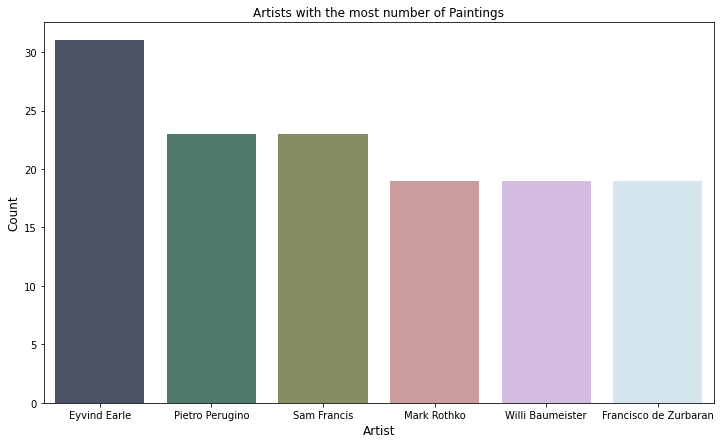

In [10]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Artist'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Artists with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


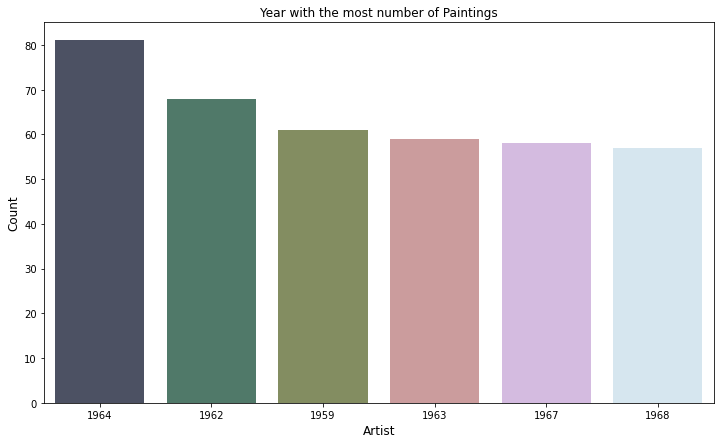

In [11]:
# Plotting a bar graph of the artists with the most paintings in the dataset
artist_values  = df['Year'].value_counts()
artist_count = artist_values[:6,]
plt.figure(figsize=(12,7))
sns.barplot(artist_count.index, artist_count.values, alpha=0.8, palette="cubehelix")
plt.title('Year with the most number of Paintings')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Artist', fontsize=12)
# plt.xticks(rotation=90)
plt.show()

In [12]:
df.isnull().sum()

ID                   0
Category             0
Artist               0
Title                0
Year                 0
Image URL            0
Painting Info URL    0
Artist Info URL      0
dtype: int64

In [13]:
df.Year.value_counts()

1964         81
1962         68
1959         61
1963         59
1967         58
             ..
1475-1478     1
1495-1515     1
1913-1915     1
1747-1749     1
1584          1
Name: Year, Length: 656, dtype: int64

In [14]:
cat_1964 = df[(df.Year == '1964')]

In [136]:
cat_1964.Category

20         Neo-Expressionism
139             Art Informel
174        Neo-Expressionism
186               Minimalism
205               Minimalism
                ...         
3828            Art Informel
3893     Lyrical Abstraction
3902    Color Field Painting
4087                 Pop Art
4096                 Pop Art
Name: Category, Length: 81, dtype: object

In [97]:
df[['Category','Year']].value_counts()


Category           Year           
Neoclassicism      XVIII-XIX cent.    33
Minimalism         1967               27
Surrealism         1937               25
Minimalism         1968               23
                   1969               22
                                      ..
                   1967-1968           1
                   1970                1
Neo-Expressionism  1950                1
                   1951                1
Abstract Art       1883                1
Length: 1219, dtype: int64

In [ ]:
Modern = ['Impressionism','Pop Art', 'Neo-Expressionism', 'Art Informel', 'Post-Impressionism','Surrealism','Lyrical Abstraction',
'Abstract Expressionism','Abstract Art','Cubism','Magic Realism']

In [ ]:
Western = ['Realism','Northern Renaissance','Baroque', 'Rococo', 'Romanticism', 'Expressionism','Neoclassicism','Early Renaissance',
'High Renaissance']

In [ ]:
Contemporary = ['Minimalism' ]

In [81]:
Modern_df = df[(df.Category =='Cubism') | (df.Category =='Impressionism') |(df.Category =='Surrealism') ]

In [82]:
Modern

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
14,577284a7edc2cb3880fe813a,Cubism,Francis Picabia,Dances at the Spring,1912,https://uploads2.wikiart.org/images/francis-pi...,https://www.wikiart.org/en/francis-picabia/dan...,https://www.wikiart.org/en/francis-picabia
28,5772819cedc2cb3880f501c7,Surrealism,Eileen Agar,The Reaper,1938,https://uploads6.wikiart.org/images/eileen-aga...,https://www.wikiart.org/en/eileen-agar/the-rea...,https://www.wikiart.org/en/eileen-agar
44,57727f7bedc2cb3880ee1357,Cubism,Amadeo de Souza-Cardoso,Landscape,1912,https://uploads8.wikiart.org/images/amadeo-de-...,https://www.wikiart.org/en/amadeo-de-souza-car...,https://www.wikiart.org/en/amadeo-de-souza-car...
...,...,...,...,...,...,...,...,...
4039,577286e4edc2cb3880058bf0,Cubism,Wyndham Lewis,Creation Myth,1927,https://uploads2.wikiart.org/images/wyndham-le...,https://www.wikiart.org/en/wyndham-lewis/creat...,https://www.wikiart.org/en/wyndham-lewis
4046,57728401edc2cb3880fc8433,Impressionism,Marie Bracquemond,Woman with an Umbrella,1880,https://uploads6.wikiart.org/images/marie-brac...,https://www.wikiart.org/en/marie-bracquemond/w...,https://www.wikiart.org/en/marie-bracquemond
4081,57727dacedc2cb3880e872bb,Surrealism,Andre Masson,Pupae to Toledo,1935,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson
4091,57727dadedc2cb3880e8733b,Surrealism,Andre Masson,Iconic views of Toledo,1936,https://uploads4.wikiart.org/images/andre-mass...,https://www.wikiart.org/en/andre-masson/no-nam...,https://www.wikiart.org/en/andre-masson


#### Data Exploring:

In [256]:
top5artists = df['Artist'].value_counts().head(5)
top5artists

Eyvind Earle        31
Pietro Perugino     23
Sam Francis         23
Mark Rothko         19
Willi Baumeister    19
Name: Artist, dtype: int64

In [263]:
df[df.Artist == 'Eyvind Earle']

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [253]:
topArtist1 = df[df.Artist == 'Eyvind Earle']
topArtist1

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
154,57727e13edc2cb3880e9b45b,Magic Realism,Eyvind Earle,My Soul,2000,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/my-sou...,https://www.wikiart.org/en/eyvind-earle
629,57727e10edc2cb3880e9b02d,Magic Realism,Eyvind Earle,Evening Magic,2000,https://uploads1.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/evenin...,https://www.wikiart.org/en/eyvind-earle
652,57727e15edc2cb3880e9b893,Magic Realism,Eyvind Earle,The Wave,1990,https://uploads5.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/the-wa...,https://www.wikiart.org/en/eyvind-earle
729,57727e17edc2cb3880e9ba8b,Magic Realism,Eyvind Earle,Moon Bath,1988,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/moon-b...,https://www.wikiart.org/en/eyvind-earle
976,57727e18edc2cb3880e9bbe1,Magic Realism,Eyvind Earle,Enchanted Coast,1980,https://uploads3.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/enchan...,https://www.wikiart.org/en/eyvind-earle
1152,57727e10edc2cb3880e9b01b,Magic Realism,Eyvind Earle,Even Tide,1994,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/even-t...,https://www.wikiart.org/en/eyvind-earle
1270,57727e12edc2cb3880e9b287,Magic Realism,Eyvind Earle,Hidden Hills,XX-XXI cent.,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/hidden...,https://www.wikiart.org/en/eyvind-earle
1586,57727e18edc2cb3880e9bbf3,Magic Realism,Eyvind Earle,Blue Pine,1980,https://uploads6.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/blue-p...,https://www.wikiart.org/en/eyvind-earle
1600,57727e15edc2cb3880e9b839,Magic Realism,Eyvind Earle,Sunset Magic,1996,https://uploads0.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/sunset...,https://www.wikiart.org/en/eyvind-earle
1608,57727e12edc2cb3880e9b1f7,Magic Realism,Eyvind Earle,Grazing in Peace,1970,https://uploads4.wikiart.org/images/eyvind-ear...,https://www.wikiart.org/en/eyvind-earle/grazin...,https://www.wikiart.org/en/eyvind-earle


In [251]:
topArtist1.Category.value_counts()

Magic Realism    31
Name: Category, dtype: int64

In [262]:
df['Category'].groupby(df['Artist']).value_counts().head(10)

Artist              Category              
Aaron Siskind       Abstract Expressionism    2
Abidin Dino         Surrealism                1
Abraham Manievich   Post-Impressionism        2
                    Cubism                    1
Abraham van Strij   Neoclassicism             8
Ad Reinhardt        Abstract Art              2
                    Color Field Painting      2
Adolph Menzel       Realism                   9
Adriaen Brouwer     Baroque                   6
Adriaen van Ostade  Baroque                   5
Name: Category, dtype: int64

In [15]:
# testing domanint color

test = df['Painting Info URL'].values[0]
test

'https://www.wikiart.org/en/charles-courtney-curran/in-the-luxembourg-garden-1889'

In [16]:
test1 = df['Painting Info URL'].values[1]
test1

'https://www.wikiart.org/en/keith-haring/the-marriage-of-heaven-and-hell-1984'

In [64]:
test2 = df['Painting Info URL'].values[2]
test2

'https://www.wikiart.org/en/jozsef-rippl-ronai/uncle-piacsek-in-front-of-the-black-sideboard-1906'

In [91]:
test2_title = df['Title'].values[2]

'Uncle Piacsek in front of the Black Sideboard'

In [105]:
list_websites = df['Painting Info URL'].values.tolist()


In [18]:
# def image_path():
#     for (columnName, columnData) in df.iteritems():
#         print('Column Name : ', 'Painting Info URL')
#         print('Column Contents : ', df['Painting Info URL'].values)
#     df['image_path'] = df.iloc[:,0].str.extract(r'(\d+ml)')

In [65]:

import requests 
from bs4 import BeautifulSoup 

In [66]:
def getdata(url): 
    r = requests.get(url) 
    return r.text 

In [134]:
htmldata = getdata(test1) 



In [135]:
# for val in df['Painting Info URL']:
#     print(val)
#     htmldata = getdata(val) 
#     # link = df['Painting Info URL'].values[i]
#     # print(link)

In [136]:
def get_list_of_images():
    list_images = []
    soup = BeautifulSoup(htmldata, 'html.parser') 
    for item in soup.find_all('img'):
        print(item['src'])
        list_images.append(item['src'])
    
    return list_images

In [137]:
list = get_list_of_images()

https://uploads.wikiart.org/Content/wiki/img/banner_top.png
https://uploads1.wikiart.org/images/keith-haring/the-marriage-of-heaven-and-hell-1984.jpg
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png
https://uploads.wikiart.org/Content/wiki/img/lazy-load-placeholder.png


In [104]:
image = list[1] 


In [97]:
import urllib.request
from PIL import Image

In [103]:
urllib.request.urlretrieve(
  image,"images/image.png")

FileNotFoundError: [Errno 2] No such file or directory: 'https://uploads4.wikiart.org/images/j-zsef-rippl-r-nai/uncle-piacsek-in-front-of-the-black-sideboard-1906.jpg!Large.jpg.png'

In [192]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

list_images=[]

for link in list_websites:

    res=requests.get(link)
    bs = BeautifulSoup(res.text, 'html.parser')
    images =bs.find_all('img')
    

    # if you want to have all image links in a row

    # list_images.append((link, [image['src'] for image in images]))


    # of if you want to have one row per link and url
    for image in images:
        if('image' in image['src']):
            list_images.append((link, image['src']))
        else:
            continue

df_images = pd.DataFrame(list_images, columns = ['Link', 'Images'])


In [186]:
df_images.head(10)

,Link,Images
0,https://www.wikiart.org/en/charles-courtney-cu...,https://uploads4.wikiart.org/00123/images/char...
1,https://www.wikiart.org/en/keith-haring/the-ma...,https://uploads1.wikiart.org/images/keith-hari...
2,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://uploads4.wikiart.org/images/j-zsef-rip...
3,https://www.wikiart.org/en/vadym-meller/monk-f...,https://uploads2.wikiart.org/00124/images/vady...
4,https://www.wikiart.org/en/david-wilkie/the-de...,https://uploads7.wikiart.org/images/david-wilk...


In [190]:
df_images['Images'][3]

'https://uploads2.wikiart.org/00124/images/vadym-meller/monk-for-the-play-mazeppa-1920.jpg'

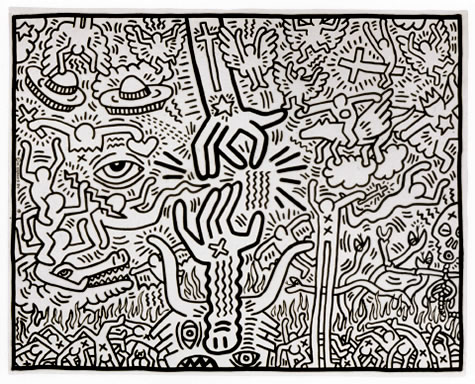

In [28]:
img = Image.open("image.png")
img.show()

In [29]:
imagePath = '/workspaces/Artist_Emotions-1/image.png'

In [22]:
pwd

'/workspaces/Artist_Emotions-1'

In [30]:
color_thief = ColorThief(imagePath)



In [32]:
# get the dominant color
dominant_color = color_thief.get_color(quality=1)

dominant_color

(29, 26, 22)

In [35]:
from colormap import rgb2hex

hex = rgb2hex(dominant_color[0], dominant_color[1],dominant_color[2])
hex


'#1D1A16'

In [36]:
type(hex)

str

In [41]:
def closest_color(requested_color):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_color[0]) ** 2
        gd = (g_c - requested_color[1]) ** 2
        bd = (b_c - requested_color[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

In [42]:
def get_color_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_color(requested_colour)
        actual_name = None
    return actual_name, closest_name

requested_colour = (dominant_color)
actual_name, closest_name = get_color_name(requested_colour)

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: black


In [43]:
get_color_name(dominant_color)

(None, 'black')

In [27]:
palette = color_thief.get_palette(color_count=6)
palette

[(191, 169, 127),
 (36, 37, 20),
 (124, 119, 41),
 (91, 103, 27),
 (150, 150, 103),
 (139, 136, 126)]

In [53]:
import cv2
# read the image



In [54]:
image1= cv2.imread(imagePath)

In [55]:
# convert to grayscale
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [ ]:

# perform edge detection
edges = cv2.Canny(grayscale, 30, 100)